In [1]:
try:
  %tensorflow_version 2.x
except Exception:
  pass

import os
# listar el sistema de archivos
import glob
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
from keras import callbacks
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras import Model

#tf.random.set_seed(2019)

Using TensorFlow backend.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:

(x,y), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

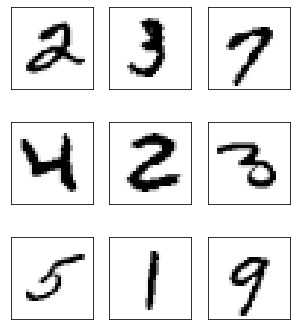

In [4]:
x_train = x
y_train = y
plt.figure(figsize=(5, 6))
for i in range(1, 10):
    plt.subplot(330 + i)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[5 * i], cmap='Greys')

In [5]:
x_Train, x_Test = x_train / 255.0, x_test / 255.0

In [6]:
x_train = x_Train[..., tf.newaxis]
x_test = x_Test[..., tf.newaxis]

In [7]:
x_train.shape

(60000, 28, 28, 1)

In [8]:
x_train = tf.image.resize(x_train, size=[32,32])
x_test = tf.image.resize(x_test, size=[32,32])

In [9]:
x_train.shape

TensorShape([60000, 32, 32, 1])

In [10]:
# Se crea una instancia del modelo
base_model = tf.keras.applications.MobileNet(weights= None, include_top=False, input_shape=(32,32,1))
# se imprime la arquitectura del modelo
base_model.summary()

Model: "mobilenet_1.00_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 1)]       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 33, 33, 1)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 16, 16, 32)        288       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 16, 16, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 16, 16, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 16, 16, 32)  

In [11]:
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation= 'relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(10, activation= 'softmax')(x)
model = Model(inputs = base_model.input, outputs = predictions)

In [12]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 1)]       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 33, 33, 1)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 16, 16, 32)        288       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 16, 16, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 16, 16, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 16, 16, 32)        128   

In [13]:
model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
model.fit(x_train, y_train, batch_size = 32, epochs = 50)

W1129 11:17:15.737787 14472 deprecation.py:323] From C:\Users\Francisco\AppData\Local\Continuum\anaconda3\envs\clasep3.6\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples
Epoch 1/50
60000/60000 [==============================] - 116s 2ms/sample - loss: 0.4510 - accuracy: 0.8623
Epoch 2/50
60000/60000 [==============================] - 115s 2ms/sample - loss: 0.1572 - accuracy: 0.9602
Epoch 3/50
60000/60000 [==============================] - 115s 2ms/sample - loss: 0.1298 - accuracy: 0.9683 - loss: 0.1298 - accura
Epoch 4/50
60000/60000 [==============================] - 109s 2ms/sample - loss: 0.1118 - accuracy: 0.9737
Epoch 5/50
60000/60000 [==============================] - 110s 2ms/sample - loss: 0.0932 - accuracy: 0.9786
Epoch 6/50
60000/60000 [==============================] - 110s 2ms/sample - loss: 0.0912 - accuracy: 0.9796
Epoch 7/50
60000/60000 [==============================] - 110s 2ms/sample - loss: 0.0714 - accuracy: 0.9835
Epoch 8/50
60000/60000 [==============================] - 109s 2ms/sample - loss: 0.0621 - accuracy: 0.9857 - loss: 0.0620 - accuracy: 0.
Epoch 9/50
60000/60000 [==============================] - 1

In [15]:
model.evaluate(x_test, y_test, batch_size=64, verbose=1)

10000/10000 [==============================] - 4s 399us/sample - loss: 0.0377 - accuracy: 0.9922


[0.03769001886101469, 0.9922]

In [16]:
model.save_weights("mnist_weigths.hdf5")

In [14]:
model2 = Model(inputs = base_model.input, outputs = predictions)
model2.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Para cargar los pesos

In [15]:
model2.load_weights("mnist_weigths.hdf5", by_name=False)

In [16]:
model2.evaluate(x_test, y_test, batch_size=64, verbose=1)

10000/10000 [==============================] - 4s 401us/sample - loss: 0.0377 - accuracy: 0.9922


[0.03769001886101469, 0.9922]

## Pruebas en affnist

In [17]:
import numpy as np
import scipy.io as spio
from matplotlib import pyplot as plt
from matplotlib import cm

def loadmat(filename):
    '''
    this function should be called instead of direct spio.loadmat
    as it cures the problem of not properly recovering python dictionaries
    from mat files. It calls the function check keys to cure all entries
    which are still mat-objects
    '''
    data = spio.loadmat(filename, struct_as_record=False, squeeze_me=True)
    return _check_keys(data)


def _check_keys(dict):
    '''
    checks if entries in dictionary are mat-objects. If yes
    todict is called to change them to nested dictionaries
    '''
    for key in dict:
        if isinstance(dict[key], spio.matlab.mio5_params.mat_struct):
            dict[key] = _todict(dict[key])
    return dict        


def _todict(matobj):
    '''
    A recursive function which constructs from matobjects nested dictionaries
    '''
    dict = {}
    for strg in matobj._fieldnames:
        elem = matobj.__dict__[strg]
        if isinstance(elem, spio.matlab.mio5_params.mat_struct):
            dict[strg] = _todict(elem)
        else:
            dict[strg] = elem
    return dict

def visualization(x, y,count,index):
    x = np.reshape(x, (40, 40))
    
    plt.subplot(1,count,index)
    plt.imshow(x, cmap=cm.Greys_r)
    plt.title(y)
    plt.axis('off')   

def visualization_overlap(x0,x1, y0,y1,count,index):
    r = np.reshape(x0, (40, 40))
    g = np.reshape(x1, (40, 40))
    b = np.zeros_like(r)
    rgb = np.stack([r,g,b],-1)
    
    plt.subplot(1,count,index)
    plt.imshow(rgb)
    plt.title('R:('+ str(y0)+','+str(y1)+')')
    plt.axis('off')   

def load_test_affNIST():
    path = 'test_affnist/test_batches/1.mat'
    dataset = loadmat(path)

    ans_set = dataset['affNISTdata']['label_int']
    test_set = dataset['affNISTdata']['image']
    for i in test_set[:100]:
         print (i)
    print ('test_set',test_set.shape)# (10000, 1600)
    print ('label_set',ans_set.shape)#(10000,)
    return test_set,ans_set

def load_train_affNIST():
    path = 'data/affNIST/train/1.mat'
    dataset = loadmat(path)

    ans_set = dataset['affNISTdata']['label_int']
    train_set = dataset['affNISTdata']['image']
    for i in train_set[:100]:
         print (i)
    print ('train_set',train_set.shape)# (60000, 1600)
    print ('label_set',ans_set.shape)#(60000,)
    return train_set,ans_set


def write_labeldata(labeldata, outputfile):
  header = np.array([0x0801, len(labeldata)], dtype='>i4')
  with open(outputfile, "wb") as f:
    f.write(header.tobytes())
    f.write(labeldata.tobytes())

def write_imagedata(imagedata, outputfile):
  header = np.array([0x0803, len(imagedata), 28, 28], dtype='>i4')
  with open(outputfile, "wb") as f:
    f.write(header.tobytes())
    f.write(imagedata.tobytes())


if __name__ == '__main__':
    
    OVERLAP = not True
    count = 10

    test_set,ans_set = load_test_affNIST()
    #print ('min',np.min(test_set[0]),np.max(test_set[0]))
    #write_labeldata(ans_set,"test_affnist/test_batches/t10k-labels-idx1-ubyte")
    #write_imagedata(test_set,"test_affnist/test_batches/t10k-images-idx3-ubyte")

    #train_set,ans_set = load_train_affNIST()
    #print ('min',np.min(train_set[0]),np.max(train_set[0]))
    #write_labeldata(ans_set,"data/affNIST/train/train-labels-idx1-ubyte")
    #write_imagedata(train_set,"data/affNIST/train/train-images-idx3-ubyte")
    # train_set_overlap = train_set[0::2]+train_set[1::2]    
    # for j in range((int)(len(ans_set)/count)):
    #     for i in range(count):
    #         index = np.minimum(j*count+i, len(ans_set)-1)
    #         if OVERLAP:
    #             visualization_overlap(train_set[index],train_set[index+1],ans_set[index],ans_set[index+1],count,i+1)
    #         else: 
    #             visualization(train_set[index], ans_set[index],count,i+1)

    #     plt.show()

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ...

In [18]:
test_set.shape

(1600, 10000)

In [19]:
tt = test_set.transpose()

In [20]:
tt2 = np.resize(tt,(10000,40,40))

In [21]:
tt2 = tt2[...,tf.newaxis]

In [22]:
tt3 = tf.image.resize(tt2, size=[32,32])

In [23]:
tt4 = tt3.numpy()

In [24]:
model2.evaluate(tt4, ans_set, batch_size=64, verbose=1)

10000/10000 [==============================] - 2s 174us/sample - loss: 4.1773 - accuracy: 0.2616


[4.177292580413819, 0.2616]